In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_customer=pd.read_csv(r"C:\Users\Original\.jupyter\Train_Customer Segmentation Classification.csv")

In [3]:
df_customer.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df_customer.shape

(8068, 11)

In [5]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
df_customer.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [7]:
df_customer['Profession'].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [8]:
df_customer['Var_1'].unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [9]:
df_customer['Segmentation'].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [10]:
df_customer['Spending_Score'].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [11]:
df_customer.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [12]:
df_customer.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [13]:
df_customer['Ever_Married'].fillna(df_customer['Ever_Married'].mode()[0],inplace=True)

In [14]:
df_customer['Graduated'].fillna(df_customer['Graduated'].mode()[0],inplace=True)

In [15]:
df_customer['Work_Experience'].fillna(df_customer['Work_Experience'].median(),inplace=True)

In [16]:
df_customer['Profession'].fillna(df_customer['Profession'].mode()[0],inplace=True)

In [17]:
df_customer['Var_1'].fillna(df_customer['Var_1'].mode()[0],inplace=True)

In [18]:
df_customer['Family_Size'].fillna(df_customer['Family_Size'].median(),inplace=True)

In [19]:
df_customer.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

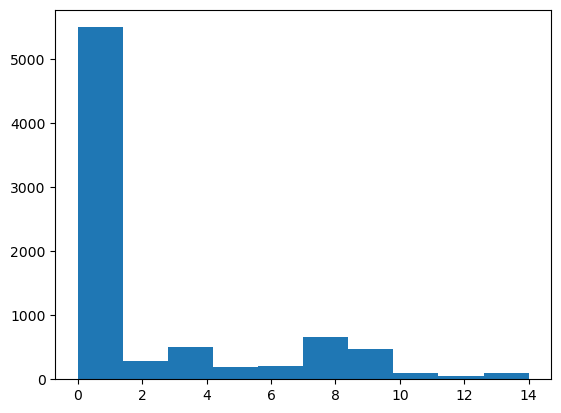

In [20]:
plt.hist(df_customer['Work_Experience'])
plt.show()

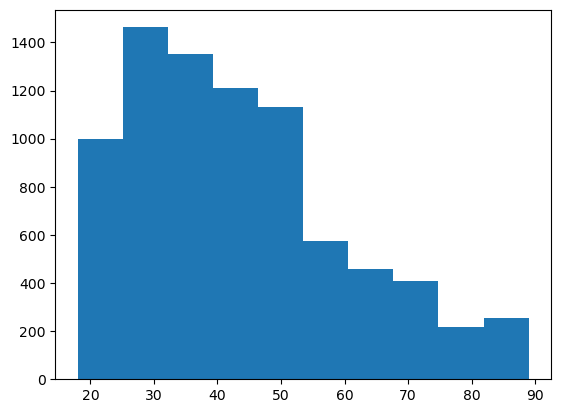

In [21]:
plt.hist(df_customer['Age'])
plt.show()

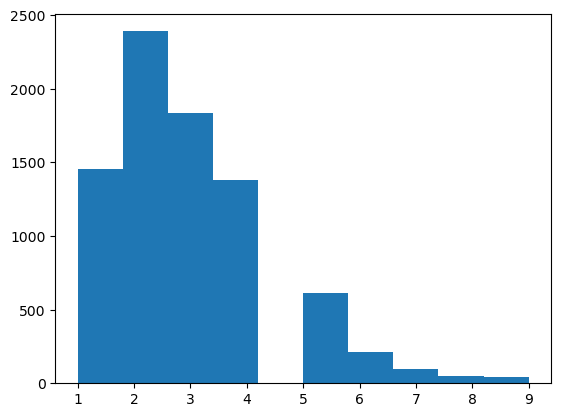

In [22]:
plt.hist(df_customer['Family_Size'])
plt.show()

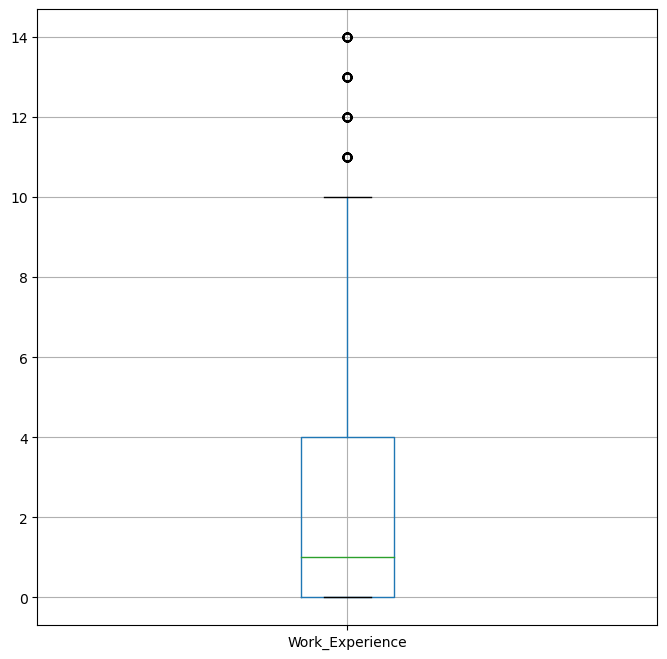

In [23]:
ax=df_customer.boxplot(column="Work_Experience",figsize=(8,8))

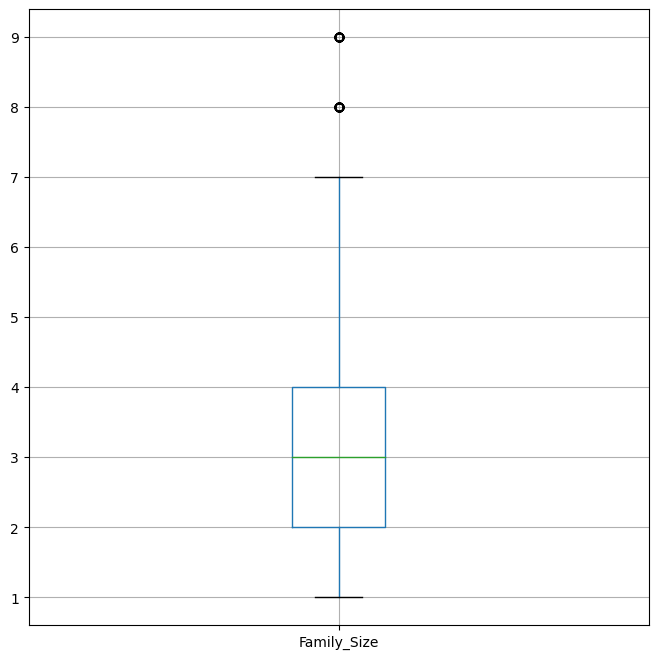

In [24]:
ax=df_customer.boxplot(column="Family_Size",figsize=(8,8))

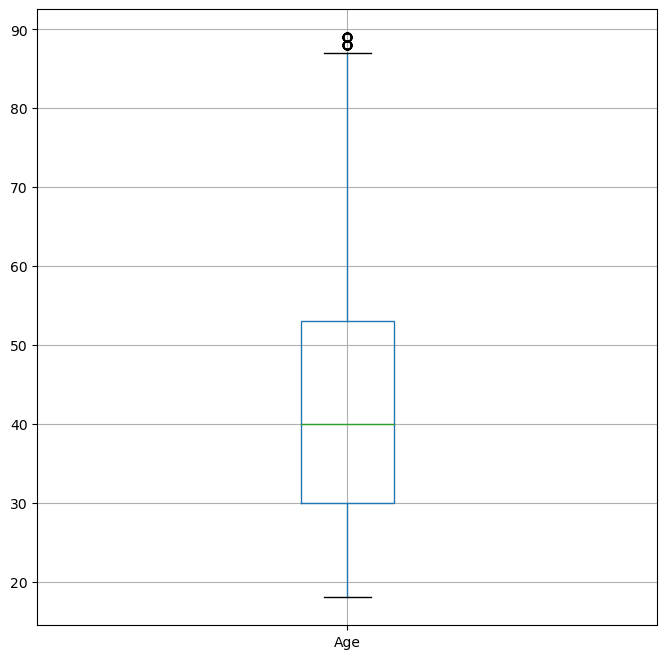

In [25]:
ax=df_customer.boxplot(column="Age",figsize=(8,8))

In [26]:
min_val=(df_customer['Work_Experience'].mean()) - (3* df_customer['Work_Experience'].std())
print(min_val)

-7.322764895256492


In [27]:
max_val=(df_customer['Work_Experience'].mean())+(3*df_customer['Work_Experience'].std())
print(max_val)

12.268724240819209


In [28]:
df_customer['Work_Experience'].unique()  

array([ 1.,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,  6.,
       10., 11.])

In [29]:
min_val=(df_customer['Family_Size'].mean()) - (3* df_customer['Family_Size'].std())
print(min_val)

-1.642383783538882


In [30]:
max_val=(df_customer['Family_Size'].mean()) + (3* df_customer['Family_Size'].std())
print(max_val)

7.355075900544335


In [31]:
df_customer['Family_Size'].unique()

array([4., 3., 1., 2., 6., 5., 8., 7., 9.])

In [32]:
min_val=(df_customer['Age'].mean()) - (3* df_customer['Age'].std())
print(min_val)

-6.668182659683708


In [33]:
max_val=(df_customer['Age'].mean()) + (3* df_customer['Age'].std())
print(max_val)

93.60199525264355


In [34]:
df_customer['Age'].unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88],
      dtype=int64)

In [35]:
def plot_boxplot(df,ft):
    df.boxplot(columns=[ft])
    plt.show()

In [36]:
def outliers (df,ft):
    q1=df[ft].quantile(0.25)
    q3=df[ft].quantile(0.75)
    IQR=q3-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q3+1.5*IQR
    ls=df.index[(df[ft] < lower_fence) | (df[ft] > upper_fence) ]
    return(ls)

In [37]:
index_list=[]
for feature in ['Work_Experience','Family_Size','Age']:
    index_list.extend(outliers(df_customer,feature))
#index_list 

In [38]:
def remove (df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return(df)

In [39]:
outliers(df_customer,'Work_Experience')

Int64Index([  20,   22,   42,   55,  176,  257,  321,  338,  367,  391,
            ...
            7586, 7663, 7726, 7798, 7808, 7835, 7870, 7990, 8028, 8043],
           dtype='int64', length=189)

In [40]:
df_cleaned=remove(df_customer,index_list)

In [41]:
df_cleaned.shape

(7720, 11)

In [42]:
df_cleaned.rename(columns={"Ever_Married":"marital status","Profession":"career"},inplace=True)

In [43]:
df_cleaned.corr

<bound method DataFrame.corr of           ID  Gender marital status  Age Graduated         career  \
0     462809    Male             No   22        No     Healthcare   
1     462643  Female            Yes   38       Yes       Engineer   
2     466315  Female            Yes   67       Yes       Engineer   
3     461735    Male            Yes   67       Yes         Lawyer   
4     462669  Female            Yes   40       Yes  Entertainment   
...      ...     ...            ...  ...       ...            ...   
8063  464018    Male             No   22        No         Artist   
8064  464685    Male             No   35        No      Executive   
8065  465406  Female             No   33       Yes     Healthcare   
8066  467299  Female             No   27       Yes     Healthcare   
8067  461879    Male            Yes   37       Yes      Executive   

      Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                 1.0            Low          4.0  Cat_4           

<AxesSubplot:>

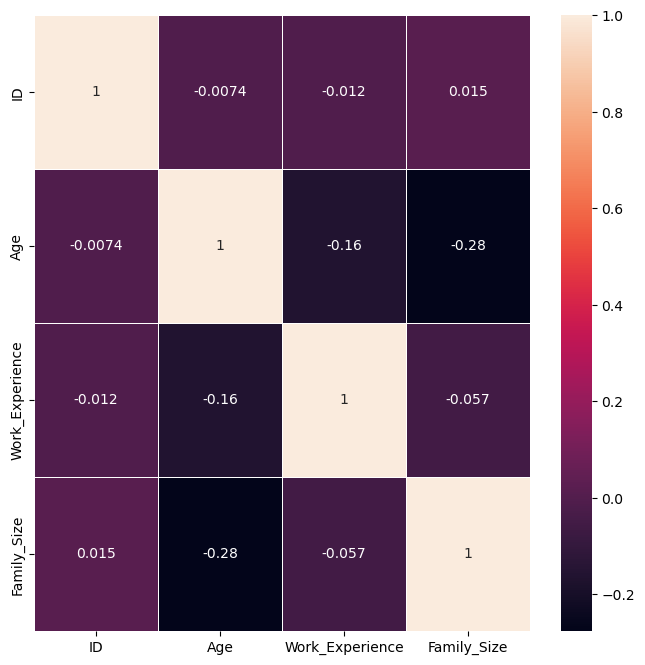

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(df_cleaned.corr(),annot=True,linewidths=.5)

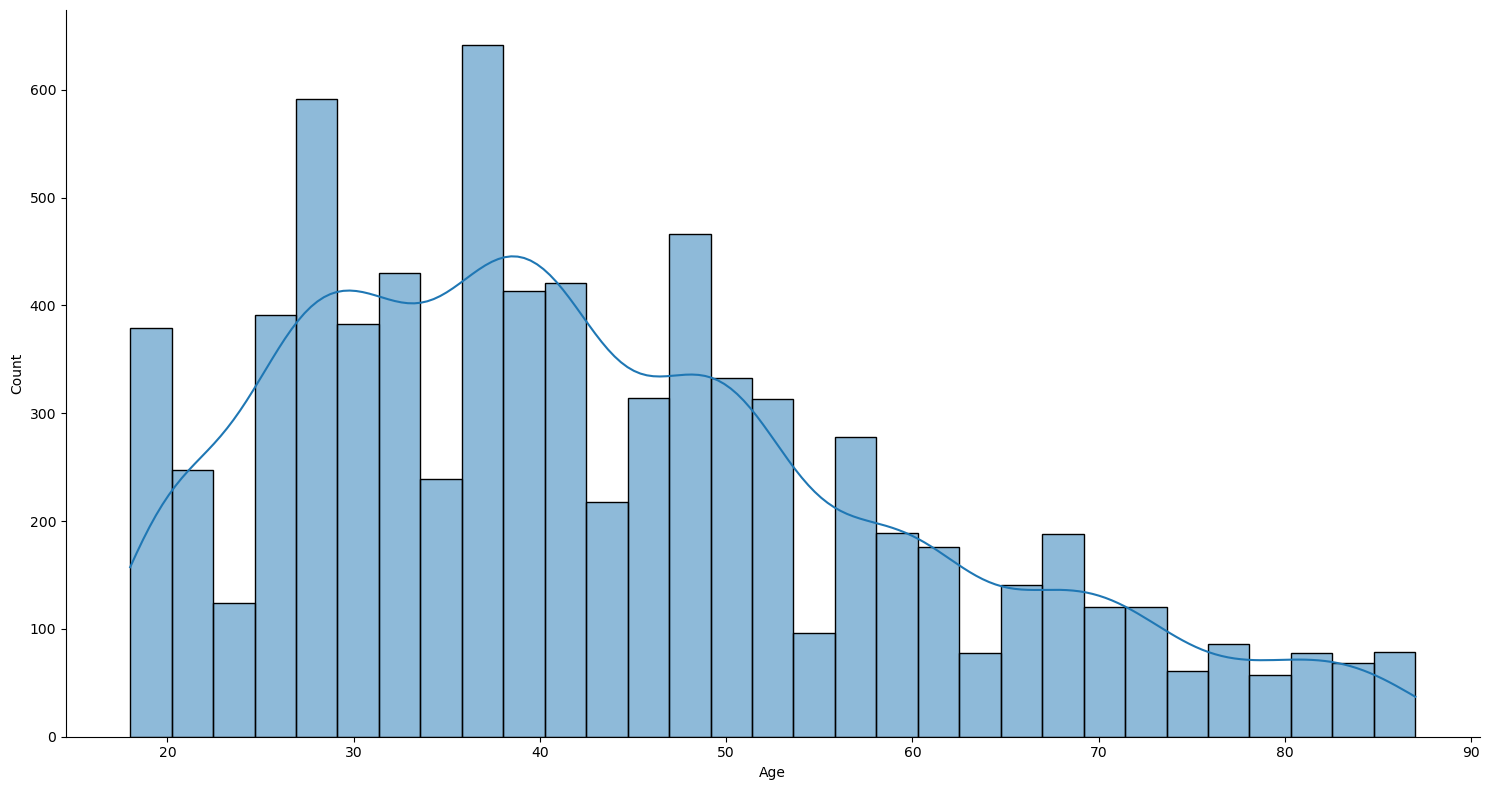

In [45]:
sns.displot(data=df_cleaned,x='Age',kde=True,height=8,aspect=15/8)

In [46]:
df_cleaned.groupby(by=['Age','Gender']).count()

ID  marital status  Graduated  career  Work_Experience  \
Age Gender                                                           
18  Female  45              45         45      45               45   
    Male    81              81         81      81               81   
19  Female  42              42         42      42               42   
    Male    86              86         86      86               86   
20  Female  52              52         52      52               52   
...         ..             ...        ...     ...              ...   
85  Male    13              13         13      13               13   
86  Female  17              17         17      17               17   
    Male    12              12         12      12               12   
87  Female  14              14         14      14               14   
    Male    14              14         14      14               14   

            Spending_Score  Family_Size  Var_1  Segmentation  
Age Gender                                                    
18  Female              45           45     45            45  
    Male                81           81     81            81  
19  Female              42           42     42            42  
    Male                86           86     86            86  
20  Female              52           52     52            52  
...                    ...          ...    ...           ...  
85  Male                13           13     13            13  
86  Female              17           17     17            17  
    Male                12           12     12            12  
87  Female              14           14     14            14  
    Male                14           14     14            14  

[130 rows x 9 columns]

In [47]:
bins=[18,21,31,41,51,61,71,81,89]
labels=['18-20','21-30','31-40','41-50','51-60','61-70','71-80','81-89']
df_cleaned['Age_group']=pd.cut(df_cleaned['Age'],bins=bins,labels=labels)
df_cleaned

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D,21-30
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A,31-40
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B,61-70
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B,61-70
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D,21-30
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D,31-40
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D,31-40
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B,21-30


<AxesSubplot:title={'center':'customer age'}, xlabel='Age_group', ylabel='count'>

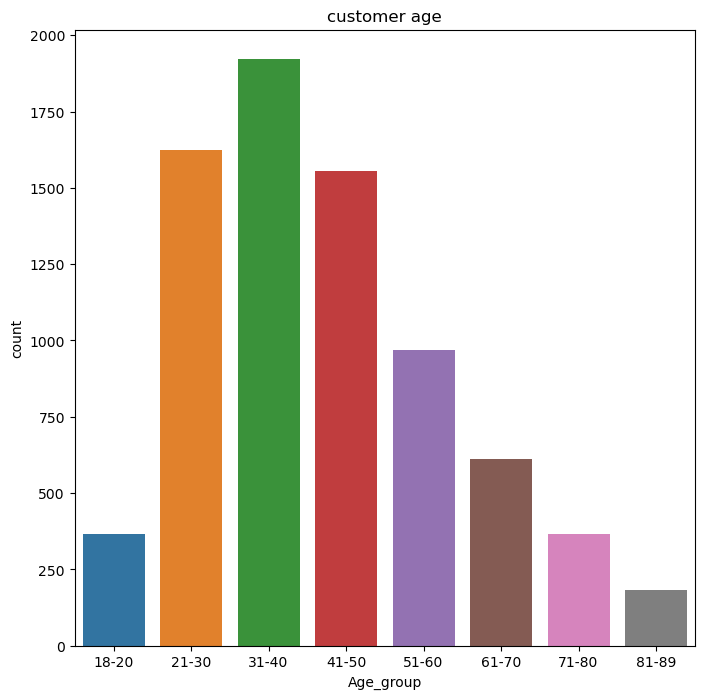

In [48]:
plt.figure(figsize=(8,8))
plt.title('customer age')
plt.xlabel('Age_group')
sns.countplot(x='Age_group',data=df_cleaned)

In [49]:
df_cleaned.pivot_table(index='Age_group',columns='Gender',values='Segmentation',aggfunc='count')

Gender,Female,Male
Age_group,,
18-20,140,225
21-30,770,855
31-40,939,983
41-50,740,814
51-60,369,599
61-70,239,372
71-80,157,209
81-89,79,104


<AxesSubplot:title={'center':'gender with age'}, xlabel='Age_group', ylabel='count'>

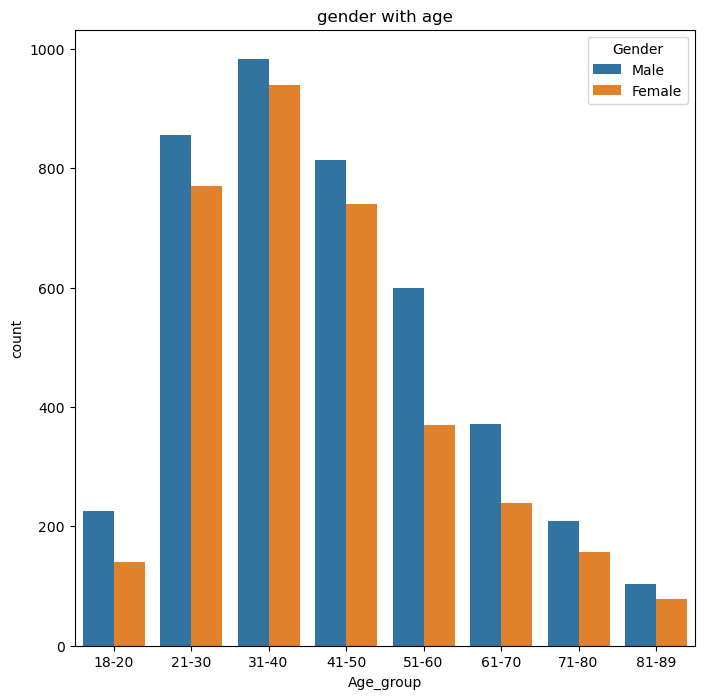

In [50]:
plt.figure(figsize=(8,8))
plt.title('gender with age')
sns.countplot(data=df_cleaned, x="Age_group", hue="Gender")

In [51]:
pivot_table=df_cleaned.pivot_table(index='career',columns='Segmentation',values='Work_Experience')
pivot_table=pivot_table.astype(int)
pivot_table

Segmentation,A,B,C,D
career,,,,
Artist,2,2,2,2
Doctor,2,1,2,2
Engineer,2,1,2,2
Entertainment,2,2,1,2
Executive,1,1,2,2
Healthcare,2,1,2,2
Homemaker,5,3,4,6
Lawyer,1,1,1,1
Marketing,2,1,2,2


In [52]:
df_cleaned.groupby(by=['ID']).count()

,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
ID,,,,,,,,,,,
458982,1,1,1,1,1,1,1,1,1,1,1
458983,1,1,1,1,1,1,1,1,1,1,1
458984,1,1,1,1,1,1,1,1,1,1,1
458985,1,1,1,1,1,1,1,1,1,1,1
458986,1,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
467969,1,1,1,1,1,1,1,1,1,1,1
467971,1,1,1,1,1,1,1,1,1,1,1
467972,1,1,1,1,1,1,1,1,1,1,1


In [53]:
df_cleaned.duplicated(['ID'])

0       False
1       False
2       False
3       False
4       False
        ...  
8063    False
8064    False
8065    False
8066    False
8067    False
Length: 7720, dtype: bool

<AxesSubplot:xlabel='Gender', ylabel='count'>

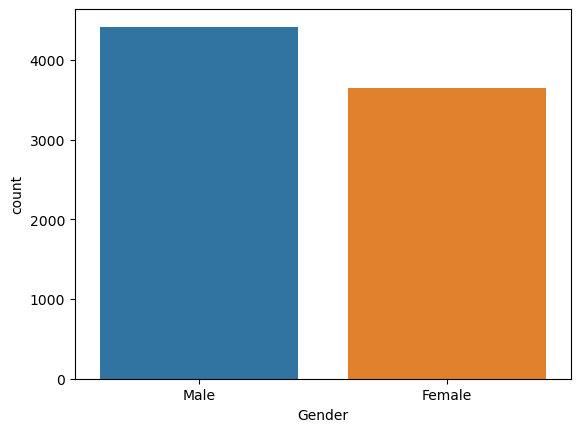

In [54]:
sns.countplot(data = df_customer, x='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

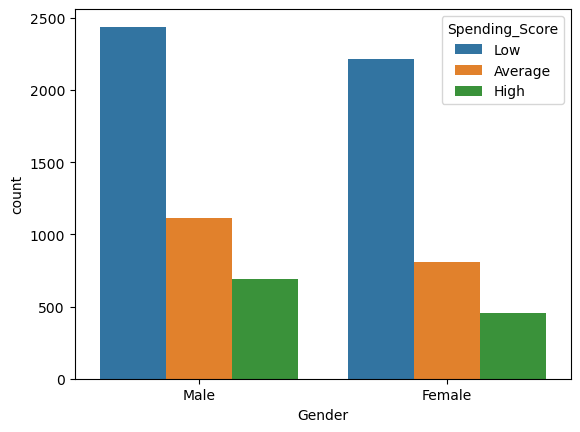

In [55]:
sns.countplot(data=df_cleaned,x='Gender',hue='Spending_Score')

<AxesSubplot:title={'center':'career and spending score'}, xlabel='career', ylabel='count'>

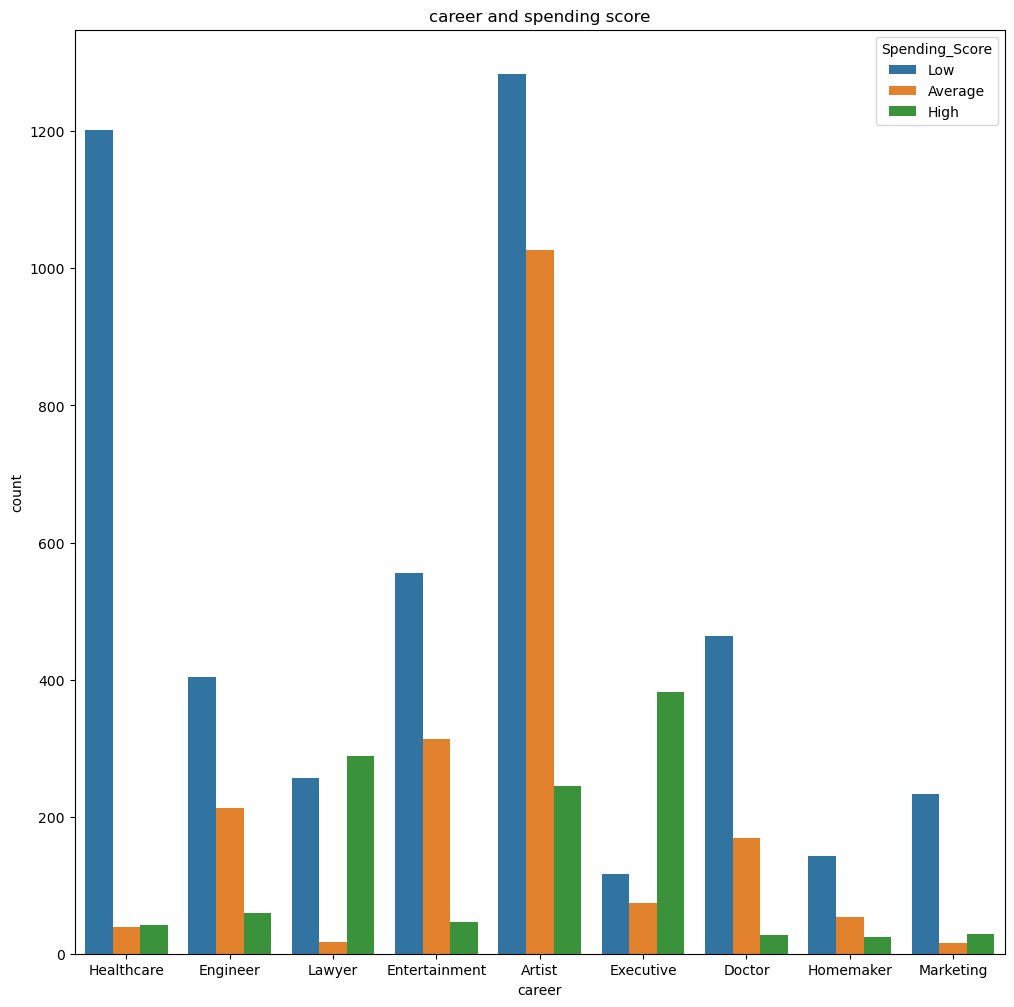

In [56]:
plt.figure(figsize=(12,12))
plt.title("career and spending score")
sns.countplot(data = df_cleaned, x='career', hue='Spending_Score')

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

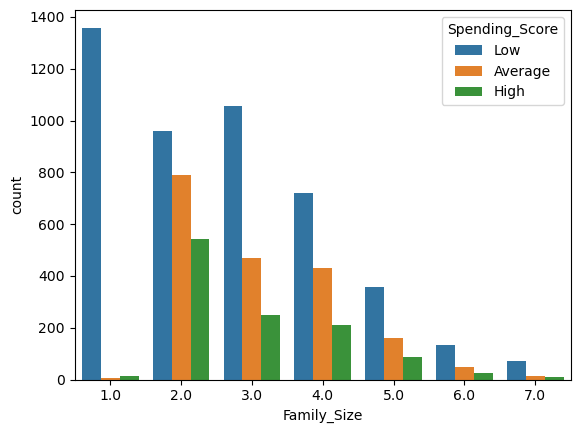

In [57]:
sns.countplot(data = df_cleaned, x='Family_Size', hue='Spending_Score')

In [58]:
df_cleaned['Gender']=df_cleaned['Gender'].map({'Male':1,'Female':0})

In [59]:
df_cleaned['marital status']=df_cleaned['marital status'].map({'Yes':1,'No':0})

In [60]:
df_cleaned['Graduated']=df_cleaned['Graduated'].map({'Yes':1,'No':0})

In [61]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,Healthcare,1.0,Low,4.0,Cat_4,D,21-30
1,462643,0,1,38,1,Engineer,1.0,Average,3.0,Cat_4,A,31-40
2,466315,0,1,67,1,Engineer,1.0,Low,1.0,Cat_6,B,61-70
3,461735,1,1,67,1,Lawyer,0.0,High,2.0,Cat_6,B,61-70
4,462669,0,1,40,1,Entertainment,1.0,High,6.0,Cat_6,A,31-40


In [62]:
df_cleaned['Spending_Score']=df_cleaned['Spending_Score'].replace(['Low','Average','High'],[0,2,1])

In [63]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df_cleaned['Var_1']=enc.fit_transform(df_cleaned['Var_1'].astype('str'))

In [64]:
df_cleaned['career']=enc.fit_transform(df_cleaned['career'].astype('str'))

In [65]:
df_cleaned['Segmentation']=enc.fit_transform(df_cleaned['Segmentation'].astype('str'))

In [66]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_group
0,462809,1,0,22,0,5,1.0,0,4.0,3,3,21-30
1,462643,0,1,38,1,2,1.0,2,3.0,3,0,31-40
2,466315,0,1,67,1,2,1.0,0,1.0,5,1,61-70
3,461735,1,1,67,1,7,0.0,1,2.0,5,1,61-70
4,462669,0,1,40,1,3,1.0,1,6.0,5,0,31-40


In [67]:
df_cleaned.drop(['Age_group'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler 
scale=StandardScaler()
scale.fit_transform(df_cleaned)
df_cleaned=pd.DataFrame(df_cleaned,columns=['ID','Gender','marital status','Age','Graduated','career','Work_Experience','Spending_Score',
       'Family_Size','Var_1','Segmentation'])

In [68]:
df_cleaned.head()

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,0,4.0,3,3
1,462643,0,1,38,1,2,1.0,2,3.0,3,0
2,466315,0,1,67,1,2,1.0,0,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,1.0,1,6.0,5,0


In [69]:
x=df_cleaned.iloc[:,:-1]
y=df_cleaned.iloc[:,-1]

In [70]:
x

,ID,Gender,marital status,Age,Graduated,career,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,1,0,22,0,5,1.0,0,4.0,3
1,462643,0,1,38,1,2,1.0,2,3.0,3
2,466315,0,1,67,1,2,1.0,0,1.0,5
3,461735,1,1,67,1,7,0.0,1,2.0,5
4,462669,0,1,40,1,3,1.0,1,6.0,5
...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,0,0.0,0,7.0,0
8064,464685,1,0,35,0,4,3.0,0,4.0,3
8065,465406,0,0,33,1,5,1.0,0,1.0,5
8066,467299,0,0,27,1,5,1.0,0,4.0,5


In [71]:
y

0       3
1       0
2       1
3       1
4       0
       ..
8063    3
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 7720, dtype: int32

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [73]:
x_train.shape

(5404, 10)

In [74]:
y_train.shape

(5404,)

In [75]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
encoded_y=lbl.fit_transform(y_train)
encoded_ytest=lbl.fit_transform(y_test)

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import time
iris = load_iris()
start_time = time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(iris.data, iris.target)

KNeighborsClassifier(n_neighbors=3)

In [77]:
error_state=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,encoded_y)
    ypred=knn.predict(x_test)
    error_state.append(np.mean(ypred != encoded_ytest))

C:\Users\Original\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Original\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `k

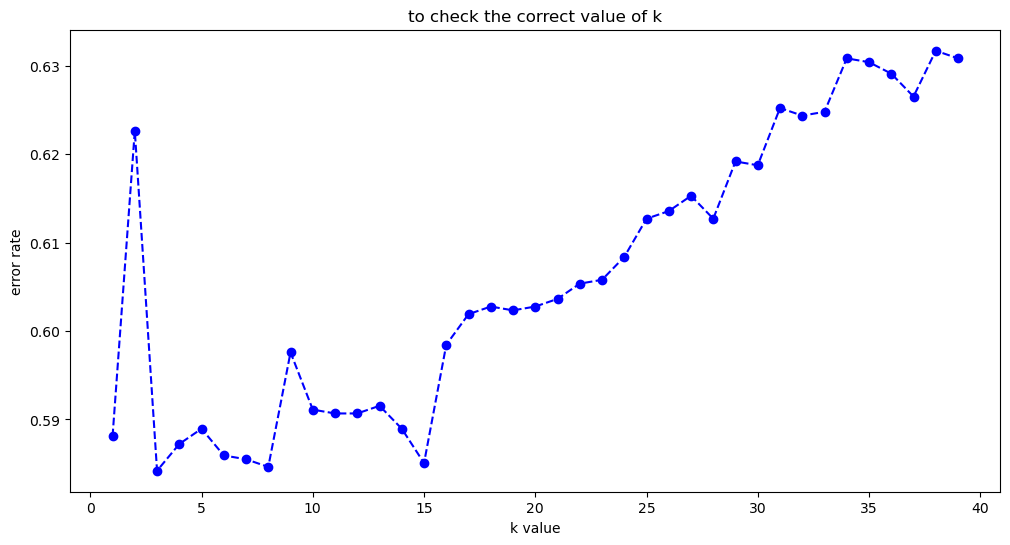

In [78]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error_state,color='blue',linestyle='dashed',marker='o')
plt.xlabel("k value")
plt.ylabel("error rate")
plt.title("to check the correct value of k")
plt.show()

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [80]:
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,encoded_y)
yknn_predict=knn.predict(x_test)
knn_conf_matrix=confusion_matrix(yknn_predict,encoded_ytest)

C:\Users\Original\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [81]:
knn_conf_matrix

array([[203, 135,  85, 150],
       [139, 151, 130,  86],
       [121, 154, 286,  79],
       [110,  86,  80, 321]], dtype=int64)

In [82]:
knn_accuracy_score=accuracy_score(yknn_predict,encoded_ytest)

In [83]:
print(np.round(knn_accuracy_score*100,2),"%")

41.49 %


In [84]:
end_time = time.time()
run_time = end_time - start_time
print("Run time:", run_time, "seconds")

Run time: 13.551846265792847 seconds
